In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from rowgenerators import RowGenerator


In [2]:
#pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-communities-2018-3.zip')
pkg = mp.jupyter.open_package()
pkg

In [3]:
tracts = pkg.resource('tract_boundaries').geoframe().set_index('geoid')
tracts.head()

,geometry
geoid,
14000US06073000100,"POLYGON ((-117.194904 32.75278, -117.19471 32...."
14000US06073000201,"POLYGON ((-117.178867 32.75765, -117.177966 32..."
14000US06073000202,"POLYGON ((-117.184043 32.74571, -117.183827 32..."
14000US06073000300,"POLYGON ((-117.168645 32.748968, -117.168404 3..."
14000US06073000400,"POLYGON ((-117.170867 32.75865, -117.170187 32..."


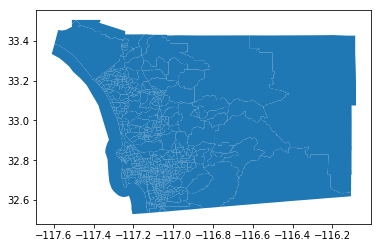

In [4]:
tracts.plot()

In [5]:
tract_info = pkg.resource('tracts').dataframe().set_index('geoid')
tract_info.head()

,statefp,countyfp,tractce,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon
geoid,,,,,,,,,,,
14000US06073000100,6,73,100,1.00,Census Tract 1,G5020,S,1541456,0,32.753005,-117.185895
14000US06073000201,6,73,201,2.01,Census Tract 2.01,G5020,S,864211,0,32.754003,-117.173377
14000US06073000202,6,73,202,2.02,Census Tract 2.02,G5020,S,1305999,0,32.745395,-117.175154
14000US06073000300,6,73,300,3.00,Census Tract 3,G5020,S,898761,0,32.744783,-117.162303
14000US06073000400,6,73,400,4.00,Census Tract 4,G5020,S,1177452,0,32.753338,-117.163070


In [6]:
pkg.resource('tract_communities').expanded_url.fspath

PosixPath('/Users/eric/proj/virt-proj/planning/planning-database/datasets/sandiegodata.org-geography-2018/_packages/sandiegodata.org-geography-2018-1/data/tract_communities.csv')

,geoid,city_name,city_code,community_name,community_cpcode,community_code
0,14000US06073020207,Escondido,ES,NaN,0,NaN
1,14000US06073020211,Escondido,ES,NaN,0,NaN
2,14000US06073020209,Escondido,ES,NaN,0,NaN
3,14000US06073020206,Escondido,ES,NaN,0,NaN
4,14000US06073020210,Escondido,ES,NaN,0,NaN


In [23]:
tract_com = pkg.resource('tract_communities').dataframe().set_index('geoid')
tract_com.head()

,city_name,city_code,community_name,community_cpcode,community_code
geoid,,,,,
14000US06073020207,Escondido,ES,NA,0,NA
14000US06073020211,Escondido,ES,NA,0,NA
14000US06073020209,Escondido,ES,NA,0,NA
14000US06073020206,Escondido,ES,NA,0,NA
14000US06073020210,Escondido,ES,NA,0,NA


In [24]:
tj = tracts.join(tract_com)
tj.head()

,geometry,city_name,city_code,community_name,community_cpcode,community_code
geoid,,,,,,
14000US06073000100,"POLYGON ((-117.194904 32.75278, -117.19471 32....",San Diego,SD,Uptown,42.0,UPT
14000US06073000201,"POLYGON ((-117.178867 32.75765, -117.177966 32...",San Diego,SD,Uptown,42.0,UPT
14000US06073000202,"POLYGON ((-117.184043 32.74571, -117.183827 32...",San Diego,SD,Uptown,42.0,UPT
14000US06073000300,"POLYGON ((-117.168645 32.748968, -117.168404 3...",San Diego,SD,Uptown,42.0,UPT
14000US06073000400,"POLYGON ((-117.170867 32.75865, -117.170187 32...",San Diego,SD,Uptown,42.0,UPT


In [26]:
tj.fillna('NA').city_code.apply(lambda v: type(v)).value_counts()

<class 'str'>    628
Name: city_code, dtype: int64

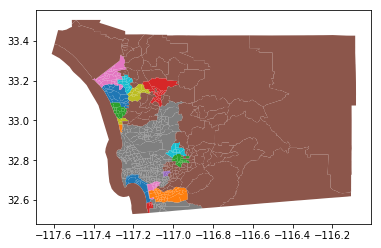

In [28]:
tj.fillna('NA').plot(column='city_code')

In [ ]:
tj.fillna('').plot(column='community_code')